In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

np.random.seed(12345)

# Create Random data
df = pd.DataFrame([np.random.normal(32000,200000,3650),
                   np.random.normal(43000,100000,3650),
                   np.random.normal(43500,140000,3650),
                   np.random.normal(48000,70000,3650)],
                  index=[1992,1993,1994,1995])

# Transpose data
df = df.T

In [24]:
# Get mean and margin of error

# T-value of 95% of normal distribution
C = 1.96

# Mean and standard deviation
m = df.mean()
s = df.std()

# Square root of sample size
r_n = np.sqrt(df.shape[0])

# Margin of error
yerr = (C * (s/r_n))

# Add mean and yerr to dataframe
agg_df = pd.DataFrame({'Mean': m, 'yerr': yerr})

In [25]:
def insert_colour(df, y_value):
    # Insert colour column which gives colour for each mean according to y value
    colour_map = {
        10: '#00386D', # Dark blue
        8: '#0073DF',
        6: '#2394FF',
        4: '#63B3FF',
        2: '#B3DAFF',
        0.0: '#D8D5D5',
        -2: '#FFC2C2',
        -4: '#FF7777',
        -6: '#F91B1B',
        -8: '#D50000',
        -10: '#710000' # Dark red
    }
    
    # Get range
    y_range = max(df['Mean']) - min(df['Mean'])
    
    # Get distance of each mean value from y_value
    distance = ((y_value - (df['Mean']))/y_range)

    # Round to the nearest even number
    distance = [int(round((x * 10)/2)*2) for x in distance]
    
    # Replace values > 10 and < -10 to 10 and -10
    distance = [10 if x > 10 else x for x in distance]
    distance = [-10 if x < -10 else x for x in distance]
    
    df['colour'] = [colour_map[x] for x in distance]
    return df

<IPython.core.display.Javascript object>


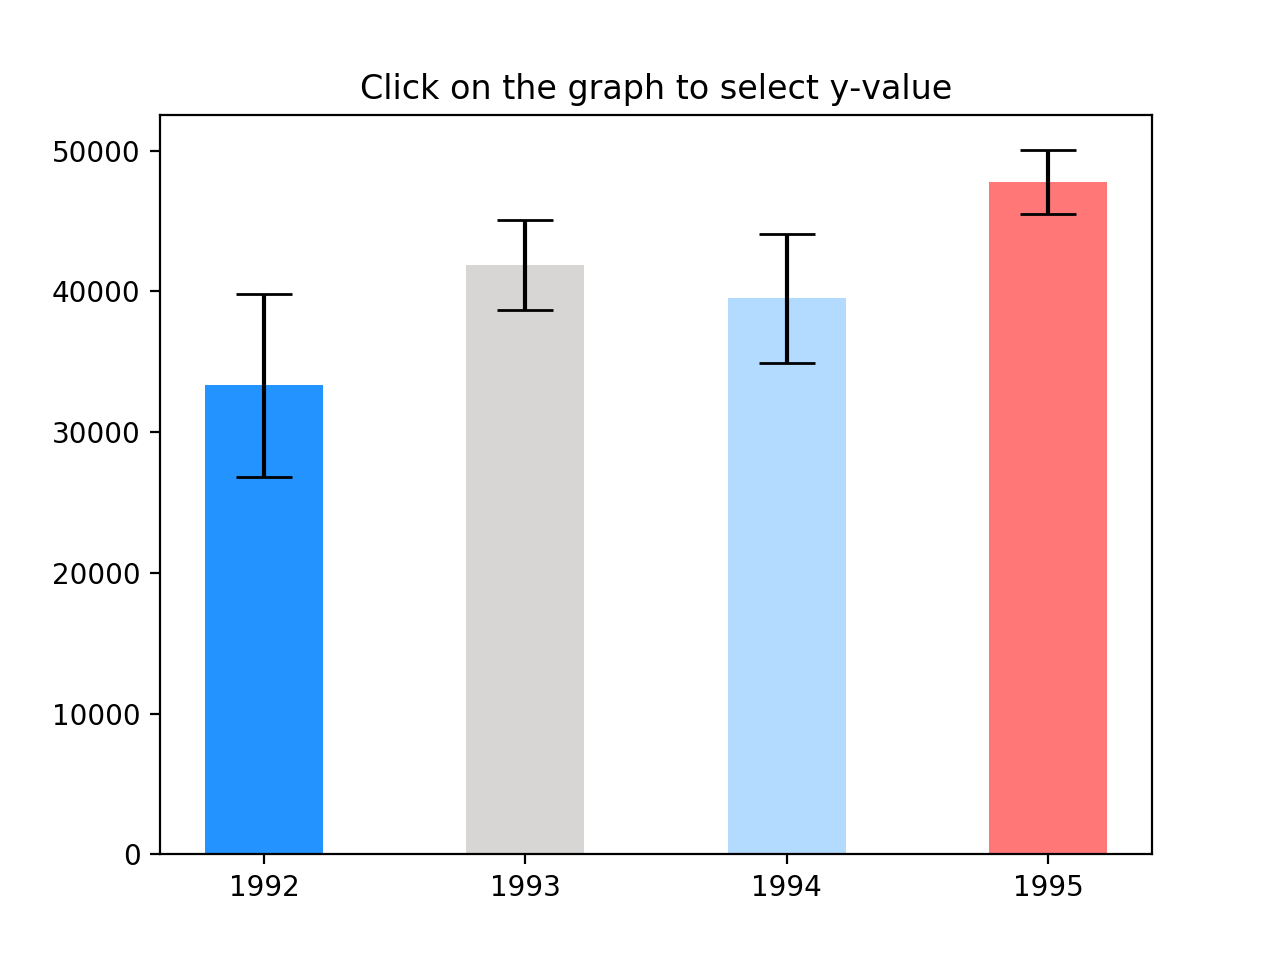

7

In [26]:
initial_y_value = 42000
plt.figure()    

def plot_bargraph(df, y_value):
    df = insert_colour(df, y_value)
    bargraph = plt.bar(
        df.index, df['Mean'], tick_label=df.index,
        yerr=df['yerr'], capsize=10,
        color=df['colour'], width=0.45
    )
    return bargraph

plot_bargraph(agg_df, initial_y_value)
plt.gca().set_title('Click on the graph to select y-value')

def onclick(event):
    plt.cla()
    y_value = event.ydata
    plot_bargraph(agg_df, y_value)
    plt.gca().set_title('y={:.0f}'.format(y_value))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [29]:
plt.savefig('snapshot_interactive_graph.png')